In [37]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

In [38]:
df = pd.read_csv("./titanic.csv", index_col="PassengerId")
df.head()

Survived  Pclass  ... Cabin Embarked
PassengerId                    ...               
1                   0       3  ...   NaN        S
2                   1       1  ...   C85        C
3                   1       3  ...   NaN        S
4                   1       1  ...  C123        S
5                   0       3  ...   NaN        S

[5 rows x 11 columns]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


On supprime les colonnes trop complexe à traiter ou avec trop de valeurs manquantes

In [40]:
to_remove = [ "Name", "Ticket", "Cabin"]

In [41]:
df.drop(columns=to_remove, inplace=True)

In [42]:
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                                
1                   0       3    male  22.0      1      0   7.2500        S
2                   1       1  female  38.0      1      0  71.2833        C
3                   1       3  female  26.0      0      0   7.9250        S
4                   1       1  female  35.0      1      0  53.1000        S
5                   0       3    male  35.0      0      0   8.0500        S

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [44]:
# df.dropna(axis=0, subset=["Age"]) # pour supprimer les valeurs manquantes sur des colonnes prédéfinies

Traitement des valeurs manquantes

In [86]:
# df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mean())

In [45]:
df = df.dropna(axis=0)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


Trier nos colonnes par type

In [47]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [53]:
categorical_features = ['Pclass', 'Sex', 'Embarked' ] # Survived est ignoré car déja bon
numerical_features = [ 'Age', 'Fare',  'SibSp', 'Parch' ]

Normalisation des colonnes numeriques

In [49]:
scaler = MinMaxScaler()
scaler.fit(df[numerical_features])

MinMaxScaler()

In [50]:
df[numerical_features] = scaler.transform(df[numerical_features])
df

Survived  Pclass     Sex  ...     Parch      Fare  Embarked
PassengerId                            ...                              
1                   0       3    male  ...  0.000000  0.014151         S
2                   1       1  female  ...  0.000000  0.139136         C
3                   1       3  female  ...  0.000000  0.015469         S
4                   1       1  female  ...  0.000000  0.103644         S
5                   0       3    male  ...  0.000000  0.015713         S
...               ...     ...     ...  ...       ...       ...       ...
886                 0       3  female  ...  0.833333  0.056848         Q
887                 0       2    male  ...  0.000000  0.025374         S
888                 1       1  female  ...  0.000000  0.058556         S
890                 1       1    male  ...  0.000000  0.058556         C
891                 0       3    male  ...  0.000000  0.015127         Q

[712 rows x 8 columns]

Encodage des colonnes categoriques

In [51]:
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [52]:
df_encoded

Survived       Age  SibSp  ...  Sex_male  Embarked_Q  Embarked_S
PassengerId                             ...                                  
1                   0  0.271174    0.2  ...      True       False        True
2                   1  0.472229    0.2  ...     False       False       False
3                   1  0.321438    0.0  ...     False       False        True
4                   1  0.434531    0.2  ...     False       False        True
5                   0  0.434531    0.0  ...      True       False        True
...               ...       ...    ...  ...       ...         ...         ...
886                 0  0.484795    0.0  ...     False        True       False
887                 0  0.334004    0.0  ...      True       False        True
888                 1  0.233476    0.0  ...     False       False        True
890                 1  0.321438    0.0  ...      True       False       False
891                 0  0.396833    0.0  ...      True        True       False

[712 rows x 10 columns]

Nécessite un jeu de données prétraité.

In [90]:
from sklearn.cluster import KMeans

In [91]:
kmean = KMeans(n_clusters=5)
kmean.fit_predict(df_encoded)

/home/jeremie/Documents/Cours/MachineLearningSOPRA/.venv/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/home/jeremie/Documents/Cours/MachineLearningSOPRA/.venv/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


array([1, 0, 3, 0, 1, 2, 1, 3, 4, 3, 0, 1, 1, 3, 4, 1, 3, 2, 4, 3, 0, 3,
       3, 2, 2, 2, 2, 2, 1, 3, 3, 3, 4, 4, 3, 3, 1, 1, 0, 4, 2, 4, 1, 4,
       1, 1, 2, 1, 4, 1, 3, 1, 2, 3, 2, 1, 1, 1, 4, 3, 1, 1, 2, 4, 3, 1,
       0, 1, 1, 1, 2, 1, 1, 2, 0, 4, 2, 3, 2, 1, 1, 1, 3, 1, 2, 3, 1, 3,
       3, 1, 1, 2, 2, 3, 2, 2, 4, 2, 1, 1, 1, 1, 1, 3, 4, 2, 2, 0, 2, 1,
       2, 3, 3, 1, 2, 2, 1, 3, 2, 2, 2, 0, 1, 1, 2, 3, 1, 1, 4, 1, 1, 1,
       1, 3, 1, 2, 1, 3, 1, 2, 1, 0, 2, 1, 1, 4, 3, 0, 1, 1, 4, 2, 3, 4,
       0, 0, 1, 4, 1, 1, 1, 1, 3, 1, 1, 3, 0, 1, 4, 1, 2, 0, 3, 2, 0, 2,
       1, 2, 1, 0, 1, 4, 1, 2, 0, 1, 2, 3, 2, 2, 4, 2, 2, 2, 1, 1, 2, 3,
       4, 0, 2, 3, 2, 1, 3, 3, 0, 0, 4, 1, 2, 2, 2, 1, 1, 0, 0, 1, 4, 2,
       0, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 4, 3, 0, 0, 2, 3, 1, 1, 3, 0, 1,
       0, 0, 2, 0, 0, 0, 4, 1, 2, 3, 4, 2, 0, 0, 1, 1, 4, 4, 0, 1, 4, 3,
       0, 2, 2, 1, 2, 0, 1, 2, 4, 0, 2, 2, 2, 4, 4, 1, 1, 1, 1, 1, 1, 0,
       4, 1, 2, 3, 1, 1, 0, 0, 0, 1, 1, 2, 3, 3, 2,

In [92]:
kmean.labels_

array([1, 0, 3, 0, 1, 2, 1, 3, 4, 3, 0, 1, 1, 3, 4, 1, 3, 2, 4, 3, 0, 3,
       3, 2, 2, 2, 2, 2, 1, 3, 3, 3, 4, 4, 3, 3, 1, 1, 0, 4, 2, 4, 1, 4,
       1, 1, 2, 1, 4, 1, 3, 1, 2, 3, 2, 1, 1, 1, 4, 3, 1, 1, 2, 4, 3, 1,
       0, 1, 1, 1, 2, 1, 1, 2, 0, 4, 2, 3, 2, 1, 1, 1, 3, 1, 2, 3, 1, 3,
       3, 1, 1, 2, 2, 3, 2, 2, 4, 2, 1, 1, 1, 1, 1, 3, 4, 2, 2, 0, 2, 1,
       2, 3, 3, 1, 2, 2, 1, 3, 2, 2, 2, 0, 1, 1, 2, 3, 1, 1, 4, 1, 1, 1,
       1, 3, 1, 2, 1, 3, 1, 2, 1, 0, 2, 1, 1, 4, 3, 0, 1, 1, 4, 2, 3, 4,
       0, 0, 1, 4, 1, 1, 1, 1, 3, 1, 1, 3, 0, 1, 4, 1, 2, 0, 3, 2, 0, 2,
       1, 2, 1, 0, 1, 4, 1, 2, 0, 1, 2, 3, 2, 2, 4, 2, 2, 2, 1, 1, 2, 3,
       4, 0, 2, 3, 2, 1, 3, 3, 0, 0, 4, 1, 2, 2, 2, 1, 1, 0, 0, 1, 4, 2,
       0, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 4, 3, 0, 0, 2, 3, 1, 1, 3, 0, 1,
       0, 0, 2, 0, 0, 0, 4, 1, 2, 3, 4, 2, 0, 0, 1, 1, 4, 4, 0, 1, 4, 3,
       0, 2, 2, 1, 2, 0, 1, 2, 4, 0, 2, 2, 2, 4, 4, 1, 1, 1, 1, 1, 1, 0,
       4, 1, 2, 3, 1, 1, 0, 0, 0, 1, 1, 2, 3, 3, 2,

In [93]:
from sklearn.decomposition import PCA

In [94]:
pca = PCA(n_components=5)

In [95]:
pca.fit(df_encoded)

PCA(n_components=5)

In [96]:
pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum()

(array([0.36531262, 0.23566041, 0.14848176, 0.0931369 , 0.06543414]),
 np.float64(0.9080258246580741))

In [97]:
df_pca = pd.DataFrame(pca.transform(df_encoded), columns=pca.get_feature_names_out())

In [98]:
df_pca.head()

pca0      pca1      pca2      pca3      pca4
0 -0.798929 -0.021943  0.159718  0.049505  0.038038
1  0.947131 -0.589655 -0.597242 -0.057062 -0.240372
2  0.265840 -0.829471  0.551772  0.108524  0.105991
3  0.831591 -0.321673  0.264199  0.220519 -0.428087
4 -0.794982  0.000712  0.135361  0.075770 -0.010536

In [84]:
pca.inverse_transform(df_pca).head() #operation +/- reversible

0         1         2  ...         7         8         9
0  0.004750  0.327110  0.110055  ...  0.997782  0.030023  1.005182
1  1.000654  0.456881  0.101594  ...  0.006537  0.128324  0.033611
2  0.997544  0.225830  0.154580  ...  0.028987  0.009591  1.004598
3  0.998514  0.468189  0.105389  ...  0.002236 -0.102924  0.972500
4 -0.004186  0.346972  0.105499  ...  1.016161  0.019600  1.007322

[5 rows x 10 columns]

In [100]:
df_pca["label"] = kmean.labels_
df_pca.head()

pca0      pca1      pca2      pca3      pca4  label
0 -0.798929 -0.021943  0.159718  0.049505  0.038038      1
1  0.947131 -0.589655 -0.597242 -0.057062 -0.240372      0
2  0.265840 -0.829471  0.551772  0.108524  0.105991      3
3  0.831591 -0.321673  0.264199  0.220519 -0.428087      0
4 -0.794982  0.000712  0.135361  0.075770 -0.010536      1

<Axes: xlabel='pca0', ylabel='pca1'>

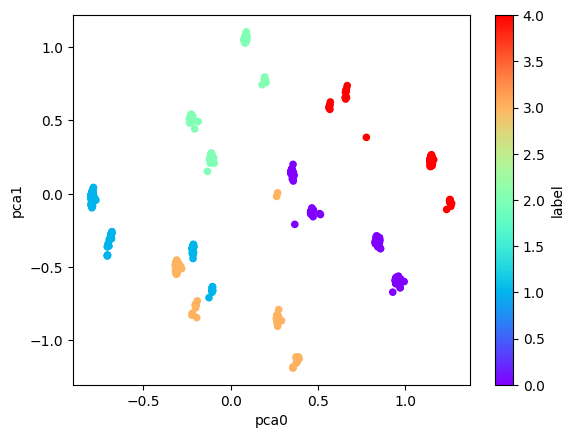

In [122]:
df_pca.plot(kind="scatter", x="pca0", y="pca1",c="label", colormap="rainbow")

Sans l'ACP les résultats du clustering sur des données avec des dimensionalités grandes est bien moins visualisable.

In [107]:
df_encoded["label"] = kmean.labels_

<Axes: xlabel='Age', ylabel='Fare'>

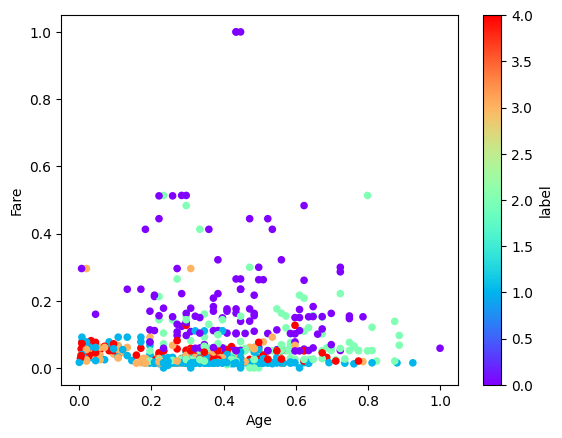

In [121]:
df_encoded.plot(kind="scatter", x="Age", y="Fare",c="label", colormap="rainbow")

<Axes: >

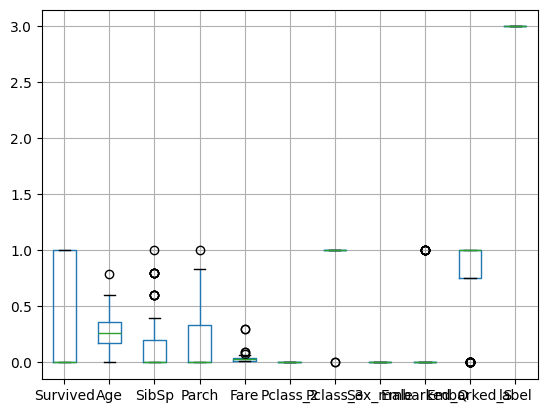

In [118]:
df_encoded[df_encoded["label"]==3].boxplot()